# Image blending by mask

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from src.config import DATA_PATH
from src.utils import plot_images
from src.blending import blending_image

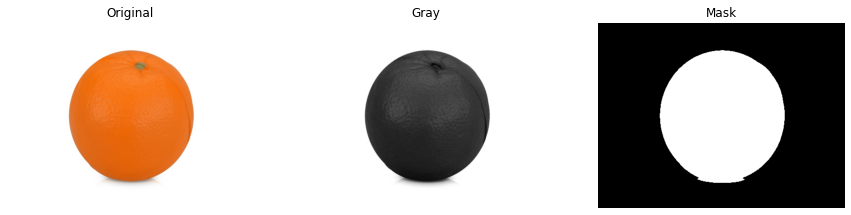

In [4]:
image_original = cv2.imread(path.join(DATA_PATH, "orange.jpg"))[..., ::-1]
image_original = cv2.resize(image_original, None, fx=0.5, fy=0.5)
target_height, target_width = image_original.shape[:2]

image_gray = cv2.cvtColor(image_original, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask
plot_images([image_original, image_gray, mask], names=["Original", "Gray", "Mask"],
            figsize=(15, 10), imshow_kwargs={"cmap": plt.cm.gray}
           )

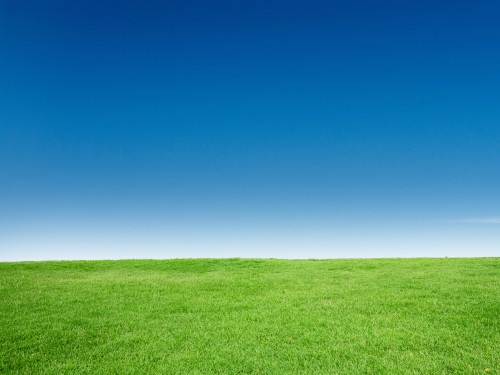

In [5]:
image_background = cv2.imread(path.join(DATA_PATH, "field.jpg"))[..., ::-1]
image_background = image_background[:target_height, :target_width]
Image.fromarray(image_background)

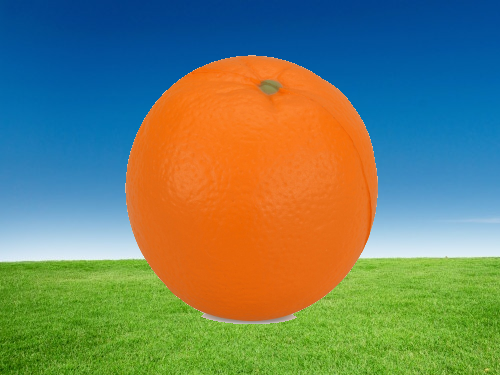

In [6]:
image_blended = blending_image(image_original, image_background, mask)
Image.fromarray(image_blended)